## Pre-Processing

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [2]:
books_data = pd.read_csv('./data/books_cleaned_data.csv')
fantasy_data = pd.read_csv('./data/fantasy_cleaned_data.csv')
total_data = pd.read_csv('./data/total_cleaned_data.csv')

In [3]:
books_data

,subreddit,selftext,title
0,books,This is one of my favorite books. I remember r...,A Wizard of Earthsea
1,books,George Orwell sees writers as having only four...,Just Read George Orwell's 'Why I Write'
2,books,With the prevalance of various forms of multi...,Books are an underrated way of learning langua...
3,books,With the prevalance of various forms of multi...,Books are an underrated way of learning langua...
4,books,I just finished reading On Juneteenth by Annet...,The Hub is Proud to Promote the Green Juneteen...
...,...,...,...
1468,books,I am currently reading Billiards at Half Past...,Please enlighten me - Billiards at Half Past N...
1469,books,I am wanting to read Uncle Tom’s Cabin by Harr...,Best copy of Uncle Tom’s Cabin?
1470,books,I am currently reading Billiards at Half Past ...,Please enlighten me - Billiards at Half Past N...
1471,books,I feel empty after finishing The Great Gatsby....,Feelings and Thoughts After Reading The Great ...


In [4]:
# map fantasy and books subreddits to 1 and 0 respectively
total_data['subreddit'] = total_data['subreddit'].map({'Fantasy': 1, 'books': 0})

In [5]:
# combine title and selftextvalues into one column
books_data['total_text'] = books_data['title'] + ' ' + books_data['selftext']
fantasy_data['total_text'] = fantasy_data['title'] + ' ' + fantasy_data['selftext']
total_data['total_text'] = total_data['title'] + ' ' + total_data['selftext']
total_data

,subreddit,selftext,title,total_text
0,0,This is one of my favorite books. I remember r...,A Wizard of Earthsea,A Wizard of Earthsea This is one of my favorit...
1,0,George Orwell sees writers as having only four...,Just Read George Orwell's 'Why I Write',Just Read George Orwell's 'Why I Write' George...
2,0,With the prevalance of various forms of multi...,Books are an underrated way of learning langua...,Books are an underrated way of learning langua...
3,0,With the prevalance of various forms of multi...,Books are an underrated way of learning langua...,Books are an underrated way of learning langua...
4,0,I just finished reading On Juneteenth by Annet...,The Hub is Proud to Promote the Green Juneteen...,The Hub is Proud to Promote the Green Juneteen...
...,...,...,...,...
3010,1,"Hope y'all will indulge me, because I'm pretty...",Finally self-published my collection of weird ...,Finally self-published my collection of weird ...
3011,1,After u/JeremySzal and u/SteveAryan's excellen...,"There And Back Again, A Writer's Journey","There And Back Again, A Writer's Journey After..."
3012,1,A partner piece to **'The Art of the deal: How...,How I Found an Agent (and then a publisher wit...,How I Found an Agent (and then a publisher wit...
3013,1,I was wondering if anybody knew of any fantasy...,Scandinavian/Viking based fantasy stories?,Scandinavian/Viking based fantasy stories? I w...


In [6]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
new_words=('book', 'books', 'cuckholdry') 
for i in new_words:
    stopwords.append(i)
print(stopwords)
#one user submitted multiple posts about 'cuckholdry', decided to remove it since it was appearing as very common word

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

---
### CountVectorizer on Books Data

In [7]:
# countvectorize books data
X = books_data['title']
y = books_data['subreddit']

In [8]:
cvec = CountVectorizer(stop_words = stopwords, ngram_range = (1,2))
cvec.fit(X)
X = cvec.transform(X)

In [9]:
books_df = pd.DataFrame(X.todense(), # 'densified' the transformed data
                        columns = cvec.get_feature_names())
                        # get_feature_names on fitted cvec gets words learned from dataset based on 'columns'

books_df

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,02,02 aug,02 madame,03,03 02,10,10 2020,10 famous,10 realized,10 reasons,...,zoet,zoet david,zookeeper,zookeeper wife,zorba,zorba greek,zsigmond,zsigmond móricz,âme,âme ending
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


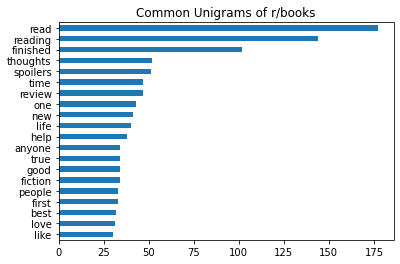

In [10]:
books_df.sum().T.sort_values(ascending = True).tail(20).plot.barh()
plt.title('Common Unigrams of r/books');

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


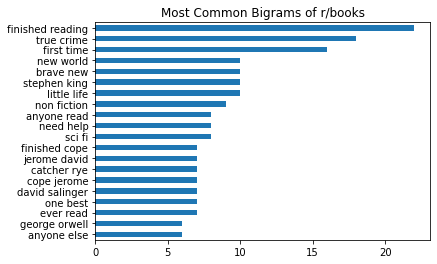

In [11]:
# countvectorize books data 
X = books_data['title']
y = books_data['subreddit']

# bigrams only
cvec = CountVectorizer(stop_words = stopwords, ngram_range = (2,2))
cvec.fit(X)
X = cvec.transform(X)

books_df = pd.DataFrame(X.todense(), # 'densified' the transformed data
                        columns = cvec.get_feature_names())
                        # get_feature_names on fitted cvec gets words learned from dataset based on 'columns'

books_df.sum().T.sort_values(ascending = True).tail(20).plot.barh()
plt.title('Most Common Bigrams of r/books');

---
### CountVectorizer on Fantasy Data

In [12]:
# countvectorize books data
X = fantasy_data['title']
y = fantasy_data['subreddit']

In [13]:
cvec = CountVectorizer(stop_words = stopwords, ngram_range = (1,2))
cvec.fit(X)
X = cvec.transform(X)

In [14]:
fantasy_df = pd.DataFrame(X.todense(), # 'densified' the transformed data
                          columns = cvec.get_feature_names())
                          # get_feature_names on fitted cvec gets words learned from dataset based on 'columns'

fantasy_df

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,06,06 2020,10,10 2020,10 cradle,10 middle,10 questions,10 sff,10 short,100,...,zetta,zetta elliot,zhao,zoe,zoe reed,zone,zone series,zoroastrianism,zárate,zárate latinx
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
fantasy_df.sum().T.sort_values(ascending = False).head(20)

review          323
fantasy         280
bingo           177
reviews         119
read             99
series           80
spoilers         72
mini             63
first            55
discussion       54
club             53
mini reviews     52
time             51
reading          50
2021             47
amp              46
2020             40
trilogy          38
finished         35
new              35
dtype: int64

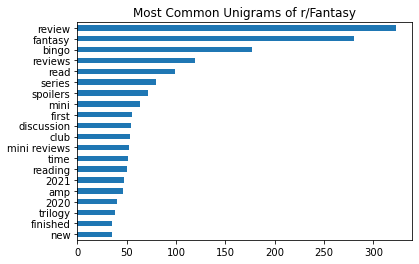

In [16]:
fantasy_df.sum().T.sort_values(ascending = True).tail(20).plot.barh()
plt.title('Most Common Unigrams of r/Fantasy');

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


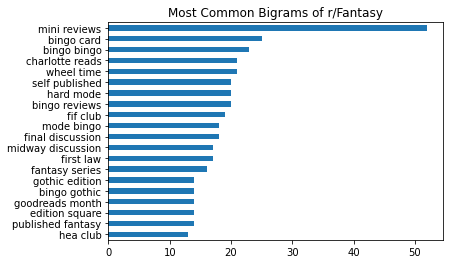

In [17]:
# countvectorize books data 
X = fantasy_data['title']
y = fantasy_data['subreddit']

# bigrams only
cvec = CountVectorizer(stop_words = stopwords, ngram_range = (2,2))
cvec.fit(X)
X = cvec.transform(X)

fantasy_df = pd.DataFrame(X.todense(), # 'densified' the transformed data
                           columns = cvec.get_feature_names())
                           # get_feature_names on fitted cvec gets words learned from dataset based on 'columns'

fantasy_df.sum().T.sort_values(ascending = True).tail(20).plot.barh()
plt.title('Most Common Bigrams of r/Fantasy');

---
### CountVectorizer on Combined Books & Fantasy Data

In [18]:
# countvectorize total data
X = total_data['title']
y = total_data['subreddit']

In [19]:
cvec = CountVectorizer(stop_words = stopwords, ngram_range = (1,2))
cvec.fit(X)
X = cvec.transform(X)

In [20]:
total_df = pd.DataFrame(X.todense(), # 'densified' the transformed data
                        columns = cvec.get_feature_names())
                        # get_feature_names on fitted cvec gets words learned from dataset based on 'columns'

total_df

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,02,02 aug,02 madame,03,03 02,06,06 2020,10,10 2020,10 cradle,...,zookeeper wife,zorba,zorba greek,zoroastrianism,zsigmond,zsigmond móricz,zárate,zárate latinx,âme,âme ending
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
total_df.sum().T.sort_values(ascending = False).head(20)

review        370
fantasy       290
read          276
reading       194
bingo         177
finished      137
spoilers      123
reviews       122
series        106
time           98
first          88
thoughts       84
one            77
new            76
discussion     72
club           69
mini           64
like           63
good           60
looking        59
dtype: int64

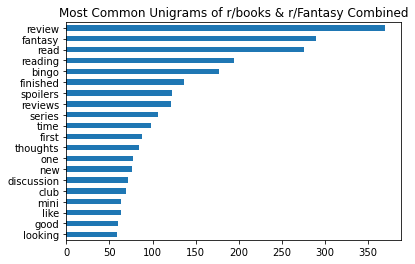

In [22]:
total_df.sum().T.sort_values(ascending = True).tail(20).plot.barh()
plt.title('Most Common Unigrams of r/books & r/Fantasy Combined');

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


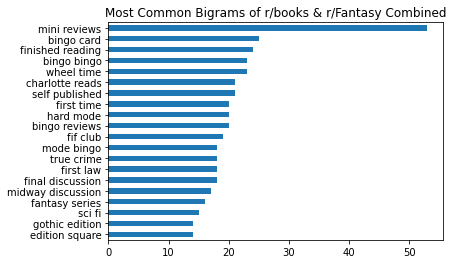

In [23]:
# countvectorize books data 
X = total_data['title']
y = total_data['subreddit']

# bigrams only
cvec = CountVectorizer(stop_words = stopwords, ngram_range = (2,2))
cvec.fit(X)
X = cvec.transform(X)

total_df = pd.DataFrame(X.todense(), # 'densified' the transformed data
                        columns = cvec.get_feature_names())
                        # get_feature_names on fitted cvec gets words learned from dataset based on 'columns'
total_df.sum().T.sort_values(ascending = True).tail(20).plot.barh()
plt.title('Most Common Bigrams of r/books & r/Fantasy Combined');

---
## GridSearch with CountVectorizer & Multinomial Naive Bayes

In [24]:
#X = data.drop(columns = 'subreddit')
X = total_data['total_text']
y = total_data['subreddit']

In [25]:
y.value_counts(normalize = True)

1    0.511443
0    0.488557
Name: subreddit, dtype: float64

In [26]:
# Redefine training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [27]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [110]:
#pipe.get_params()

In [92]:
pipe_params = {
    'cvec__max_features': [2_000, 3_000], # max num of features
    'cvec__min_df': [2, 3], # min num of documents needed in percentage
    'cvec__max_df': [.9, .95], # max num of documents needed in percentage
    'cvec__ngram_range': [(1, 1), (1, 2)], # individual and bigrams
    'cvec__stop_words': ['english', stopwords]
}

In [93]:
gs = GridSearchCV(pipe, 
                  param_grid = pipe_params, 
                  cv = 5) 

In [94]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english',
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                             

In [95]:
gs.best_score_

0.8443317900330148

In [96]:
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 3000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

In [97]:
print(f'Train Score: {gs.score(X_train, y_train)}')
print(f'Test Score: {gs.score(X_test, y_test)}')

Train Score: 0.8863334807607254
Test Score: 0.8713527851458885


In [98]:
preds = gs.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


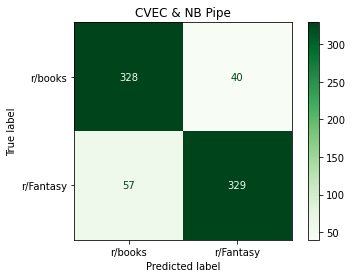

In [99]:
# confusion matrix
plot_confusion_matrix(gs, X_test, y_test, cmap='Greens', display_labels = ['r/books', 'r/Fantasy'])
plt.title('CVEC & NB Pipe');

In [100]:
#(gs.predict_proba(X_test)[:,1]>=0.6).astype(int)

In [101]:
#pred_proba = (gs.predict_proba(X_test)[:,1]>=0.6).astype(int)
pred_proba = gs.predict_proba(X_test)

In [102]:
pred_df = pd.DataFrame({'true_values': y_test,
              'pred_probs': gs.predict_proba(X_test)[:,1]})

In [103]:
pred_df.head()

,true_values,pred_probs
1154,0,2.100536e-05
1109,0,9.242910e-147
1894,1,1.364866e-04
245,0,1.244183e-12
2916,1,9.966087e-01


Text(0.5, 1.0, 'Distribution of r/Fantasy Predicted Probabilites')

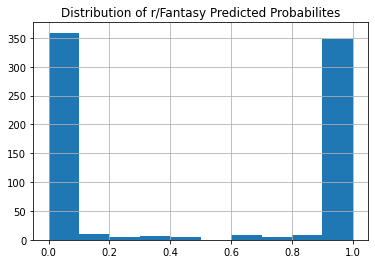

In [104]:
pred_df['pred_probs'].hist()
plt.title('Distribution of r/Fantasy Predicted Probabilites')

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


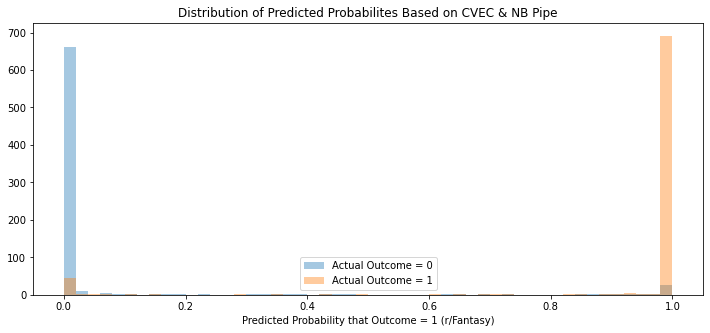

In [105]:
plt.figure(figsize = (12, 5))

# plot distributions of predicted probabilities by actual values
for group in pred_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 50, label = f'Actual Outcome = {group[0]}')

plt.xlabel('Predicted Probability that Outcome = 1 (r/Fantasy)')
plt.title('Distribution of Predicted Probabilites Based on CVEC & NB Pipe')
plt.legend();

In [106]:
pred_proba_df=pd.DataFrame(pred_proba)
pred_proba_df

,0,1
0,0.999979,2.100536e-05
1,1.000000,9.242910e-147
2,0.999864,1.364866e-04
3,1.000000,1.244183e-12
4,0.003391,9.966087e-01
...,...,...
749,0.999894,1.062364e-04
750,1.000000,9.886764e-09
751,0.999906,9.398470e-05
752,1.000000,9.451840e-20


<AxesSubplot:>

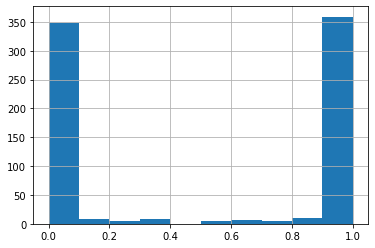

In [107]:
pred_proba_df[0].hist()

---
## GridSearch with TFIDVectorizer & Multinomial Naive Bayes

In [45]:
X = total_data['total_text']
y = total_data['subreddit']

In [46]:
tvec = TfidfVectorizer(stop_words = 'english', ngram_range= (1,2))
tvec.fit(X)
#X = tvec.transform(X)

TfidfVectorizer(ngram_range=(1, 2), stop_words='english')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [49]:
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

pipe_tvec_params = {
    'tvec__max_features': [2_000, 3_000, 4_000],
    'tvec__ngram_range': [(1, 1), (1, 2)],
    'tvec__min_df': [2, 3, 4, 5], # min num of documents needed in percentage
    'tvec__max_df': [.9, .95],# max num of documents needed in percentage
    'tvec__stop_words': ['english', stopwords]
}

In [50]:
pipe_tvec.get_params()

{'memory': None,
 'steps': [('tvec', TfidfVectorizer()), ('nb', MultinomialNB())],
 'verbose': False,
 'tvec': TfidfVectorizer(),
 'nb': MultinomialNB(),
 'tvec__analyzer': 'word',
 'tvec__binary': False,
 'tvec__decode_error': 'strict',
 'tvec__dtype': numpy.float64,
 'tvec__encoding': 'utf-8',
 'tvec__input': 'content',
 'tvec__lowercase': True,
 'tvec__max_df': 1.0,
 'tvec__max_features': None,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1),
 'tvec__norm': 'l2',
 'tvec__preprocessor': None,
 'tvec__smooth_idf': True,
 'tvec__stop_words': None,
 'tvec__strip_accents': None,
 'tvec__sublinear_tf': False,
 'tvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tvec__tokenizer': None,
 'tvec__use_idf': True,
 'tvec__vocabulary': None,
 'nb__alpha': 1.0,
 'nb__class_prior': None,
 'nb__fit_prior': True}

In [51]:
gs_tvec = GridSearchCV(pipe_tvec,
                       param_grid = pipe_tvec_params,
                       cv = 5)

In [52]:
gs_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000],
                         'tvec__min_df': [2, 3, 4, 5],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english',
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                 

In [53]:
gs_tvec.best_params_

{'tvec__max_df': 0.9,
 'tvec__max_features': 4000,
 'tvec__min_df': 5,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

In [54]:
print(f'Train Score: {gs_tvec.score(X_train, y_train)}')
print(f'Test Score: {gs_tvec.score(X_test, y_test)}')

Train Score: 0.8978328173374613
Test Score: 0.8554376657824934


In [55]:
# predictions
preds_tvec = gs_tvec.predict(X_test)

# confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_tvec).ravel()

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


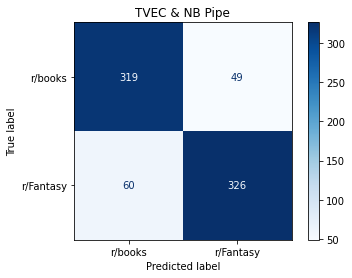

In [56]:
plot_confusion_matrix(gs_tvec, X_test, y_test, cmap = 'Blues', display_labels = ['r/books', 'r/Fantasy'])
plt.title('TVEC & NB Pipe');

In [57]:
gs_tvec_feature_probs = gs_tvec.best_estimator_.named_steps['nb'].feature_log_prob_[0]

In [58]:
gs_tvec_feature_names = gs_tvec.best_estimator_.named_steps['tvec'].get_feature_names()
#zip with above, one may have big log prob that is forcing it to be keyed

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [59]:
zipped = zip(gs_tvec_feature_names, gs_tvec_feature_probs)

In [60]:
zipped_df = pd.DataFrame(zipped, columns = ['feature_name', 'feature_prob'])
zipped_df

,feature_name,feature_prob
0,000,-8.494925
1,01,-8.874502
2,02,-9.246749
3,03,-9.012072
4,04,-9.410752
...,...,...
3995,youtube,-7.660337
3996,zero,-8.626266
3997,zeus,-9.261331
3998,zombie,-9.163384


In [61]:
zipped_df.describe()

,feature_prob
count,4000.000000
mean,-8.514758
std,0.582598
min,-9.410752
25%,-8.908874
50%,-8.624118
75%,-8.221531
max,-5.006080


In [62]:
zipped_df.max()

feature_name       zone
feature_prob   -5.00608
dtype: object

In [63]:
zipped_df.min()

feature_name         000
feature_prob   -9.410752
dtype: object

In [64]:
tvec_pred_df = pd.DataFrame({'true_values': y_test,
                             'pred_probs': gs_tvec.predict_proba(X_test)[:,1]})

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


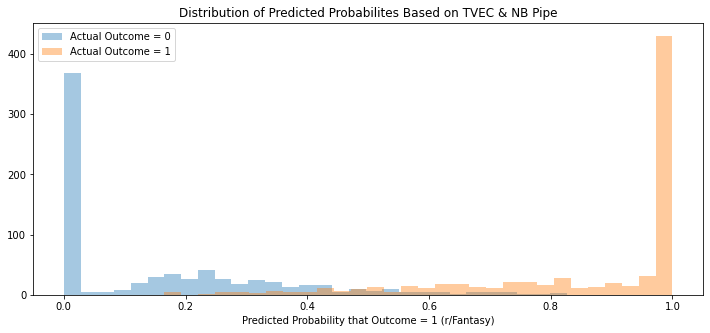

In [65]:
plt.figure(figsize = (12, 5))

# plot distributions of predicted probabilities by actual values
for group in tvec_pred_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 30, label = f'Actual Outcome = {group[0]}')

plt.xlabel('Predicted Probability that Outcome = 1 (r/Fantasy)')
plt.title('Distribution of Predicted Probabilites Based on TVEC & NB Pipe')
plt.legend();

---
## GridSearch with CountVectorizer & LogisticRegression

In [66]:
X = total_data['total_text']
y = total_data['subreddit']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [68]:
logreg_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression(max_iter = 10_000))
])

In [108]:
#logreg_pipe.get_params()

In [70]:
pipe_params = {
    'cvec__max_features': [3_000, 4_000, 5_000], # max num of features
    'cvec__min_df': [2, 3, 4, 5, 10], # min num of documents needed in percentage
    'cvec__max_df': [.9, .95], # max num of documents needed in percentage
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'cvec__stop_words': ['english'],
    'logreg__C': [0.01, 0.1, 0.5, 1]
}

In [71]:
gs_logreg = GridSearchCV(logreg_pipe, 
                         param_grid = pipe_params, 
                         cv = 5) 

In [72]:
gs_logreg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('logreg',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [3000, 4000, 5000],
                         'cvec__min_df': [2, 3, 4, 5, 10],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english'],
                         'logreg__C': [0.01, 0.1, 0.5, 1]})

In [73]:
print(f'Train Score: {gs_logreg.score(X_train, y_train)}')
print(f'Test Score: {gs_logreg.score(X_test, y_test)}')

Train Score: 0.9177355152587351
Test Score: 0.8713527851458885


In [75]:
logreg_pred_df = pd.DataFrame({'true_values': y_test,
                               'pred_probs': gs_logreg.predict_proba(X_test)[:,1]})

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


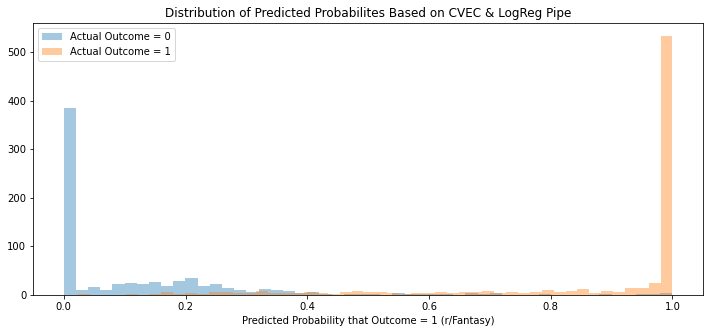

In [76]:
plt.figure(figsize = (12, 5))

# plot distributions of predicted probabilities by actual values
for group in logreg_pred_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 50, label = f'Actual Outcome = {group[0]}')

plt.xlabel('Predicted Probability that Outcome = 1 (r/Fantasy)')
plt.title('Distribution of Predicted Probabilites Based on CVEC & LogReg Pipe')
plt.legend();

In [77]:
# predictions
preds_logreg = gs_logreg.predict(X_test)

# confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_logreg).ravel()

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


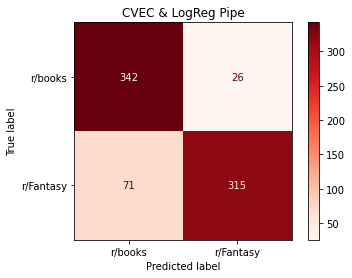

In [78]:
plot_confusion_matrix(gs_logreg, X_test, y_test, cmap = 'Reds', display_labels = ['r/books', 'r/Fantasy'])
plt.title('CVEC & LogReg Pipe');

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Us

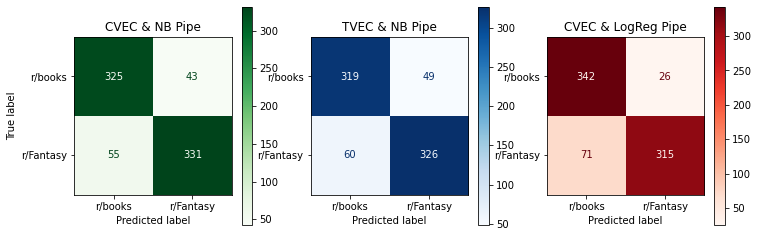

In [79]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))
plot_confusion_matrix(gs, X_test, y_test, cmap='Greens', display_labels = ['r/books', 'r/Fantasy'], ax = ax[0])
plot_confusion_matrix(gs_tvec, X_test, y_test, cmap = 'Blues', display_labels = ['r/books', 'r/Fantasy'], ax = ax[1])
plot_confusion_matrix(gs_logreg, X_test, y_test, cmap = 'Reds', display_labels = ['r/books', 'r/Fantasy'], ax = ax[2])
ax[0].set_title('CVEC & NB Pipe')
ax[1].set_title('TVEC & NB Pipe')
ax[2].set_title('CVEC & LogReg Pipe');

---
## GridSearch with CountVectorizer & RandomForestClassifier

In [80]:
X = total_data['total_text']
y = total_data['subreddit']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [82]:
pipe_rf = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier(n_estimators = 100))
])

In [84]:
rf_params = {
    'cvec__stop_words': ['english'], #stop words
    'cvec__min_df': [2, 3], # min num of documents needed in percentage
    'cvec__max_df': [.9, .95], # max num of documents needed in percentage
    'cvec__ngram_range': [(1, 2)], # individual and bigrams
    'rf__n_estimators': [100, 150, 200],
    'rf__max_depth': [None, 1, 2, 3, 4, 5],
    'rf__min_samples_leaf': [2, 4, 6, 8, 10]
}

In [85]:
gs_rf = GridSearchCV(pipe_rf, param_grid = rf_params, cv = 5)
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'cvec__max_df': [0.9, 0.95], 'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 2)],
                         'cvec__stop_words': ['english'],
                         'rf__max_depth': [None, 1, 2, 3, 4, 5],
                         'rf__min_samples_leaf': [2, 4, 6, 8, 10],
                         'rf__n_estimators': [100, 150, 200]})

In [86]:
gs_rf.best_params_

{'cvec__max_df': 0.95,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english',
 'rf__max_depth': None,
 'rf__min_samples_leaf': 2,
 'rf__n_estimators': 100}

In [87]:
print(f'Train Score: {gs_rf.score(X_train, y_train)}')
print(f'Test Score: {gs_rf.score(X_test, y_test)}')

Train Score: 0.9655019902697921
Test Score: 0.8328912466843501


In [88]:
rf_pred_df = pd.DataFrame({'true_values': y_test,
                           'pred_probs': gs_rf.predict_proba(X_test)[:,1]})

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


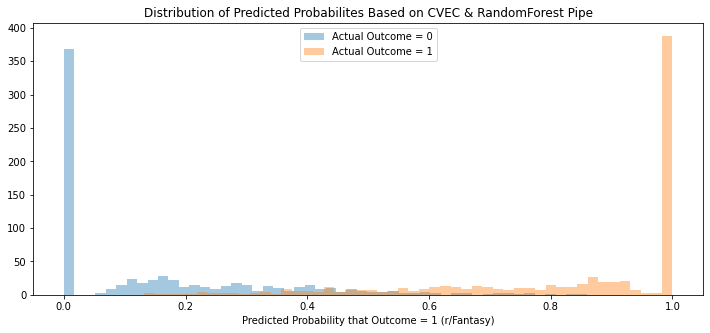

In [89]:
plt.figure(figsize = (12, 5))

# plot distributions of predicted probabilities by actual values
for group in rf_pred_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 50, label = f'Actual Outcome = {group[0]}')

plt.xlabel('Predicted Probability that Outcome = 1 (r/Fantasy)')
plt.title('Distribution of Predicted Probabilites Based on CVEC & RandomForest Pipe')
plt.legend();

In [90]:
# predictions
preds_rf = gs_rf.predict(X_test)

# confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_rf).ravel()

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


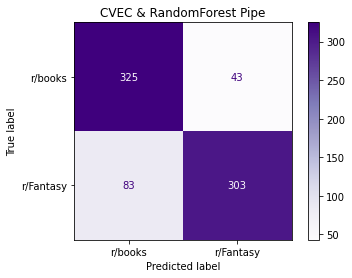

In [91]:
plot_confusion_matrix(gs_rf, X_test, y_test, cmap = 'Purples', display_labels = ['r/books', 'r/Fantasy'])
plt.title('CVEC & RandomForest Pipe');